# Step 1: Big picture and Setup

In [103]:
import sklearn
import numpy as np 
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
ASSIGNMENT = "boston_housing_codeathon"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", ASSIGNMENT)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# Step 2: Get the data

In [104]:
import pandas as pd

col_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing = pd.read_csv("/content/housing.csv", names=col_names)


In [105]:
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [106]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [107]:
housing.describe()

# normalize features 0 - 1
# look at corrs
# feature engineering 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


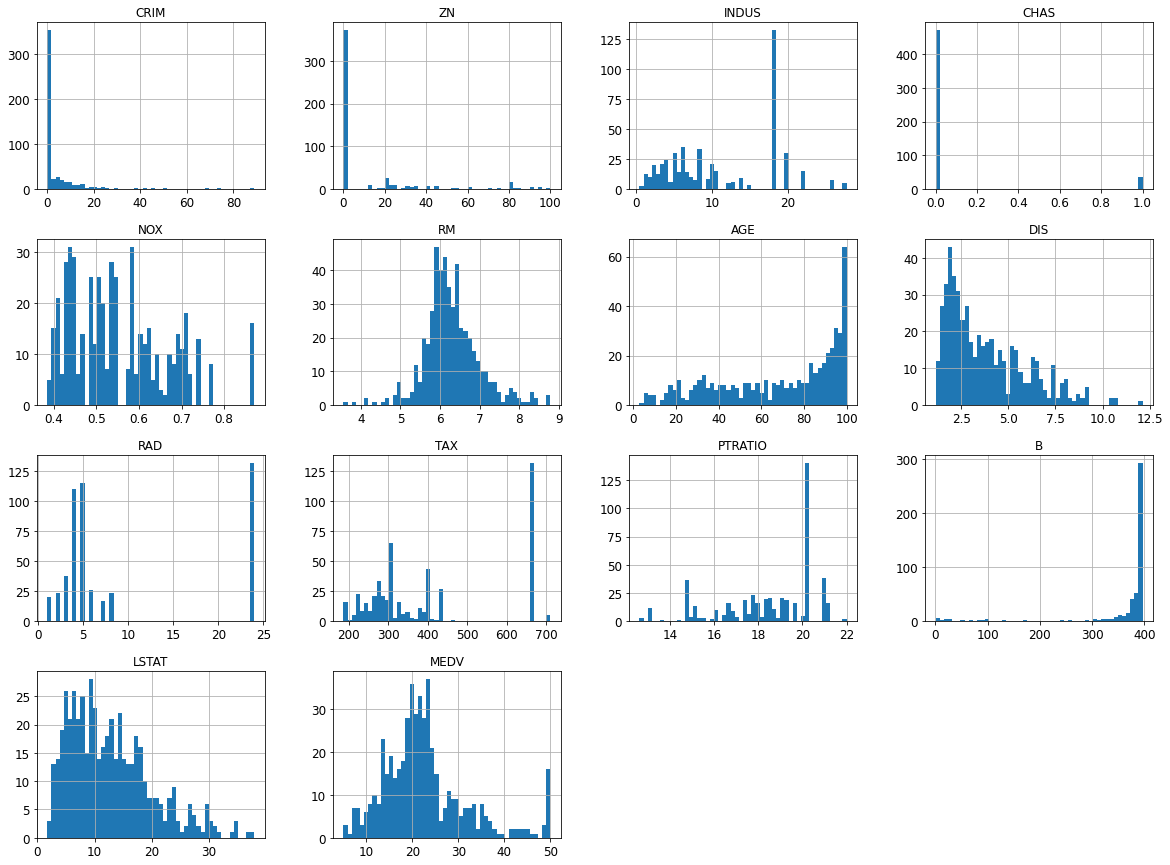

In [108]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's



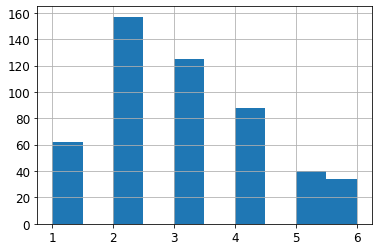

In [109]:
housing['LSTAT_cat'] = pd.cut(housing['LSTAT'],
                              bins=[0.,5,10,15,20,25, np.inf],
                              labels=[1,2,3,4,5,6])
housing['LSTAT_cat'].hist()

In [110]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,test_size=0.2, random_state=17)

for train_index, test_index in split.split(housing, housing['LSTAT_cat']):
  strat_train = housing.loc[train_index]
  strat_test = housing.loc[test_index]

print(strat_test["LSTAT_cat"].value_counts() / len(strat_test))

print(housing['LSTAT_cat'].value_counts() / len(housing))


2    0.313725
3    0.245098
4    0.176471
1    0.117647
5    0.078431
6    0.068627
Name: LSTAT_cat, dtype: float64
2    0.310277
3    0.247036
4    0.173913
1    0.122530
5    0.079051
6    0.067194
Name: LSTAT_cat, dtype: float64


# Step 3: Discover and Visualize Data


In [111]:
for set in (strat_train, strat_test): 
  set.drop("LSTAT_cat", axis = 1, inplace=True)

housing = strat_train.copy()

In [112]:
corr_matrix = housing.corr()
corr_matrix.shape

(14, 14)

In [113]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.660616
B          0.323936
ZN         0.322365
DIS        0.216785
CHAS       0.152789
AGE       -0.334350
RAD       -0.383186
CRIM      -0.385914
NOX       -0.420980
TAX       -0.470507
PTRATIO   -0.475416
INDUS     -0.481054
LSTAT     -0.729506
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe11f58a350>,
      dtype=object)

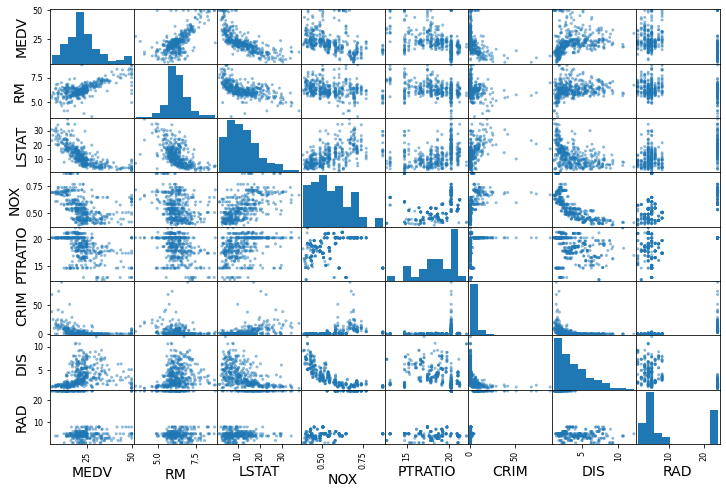

In [114]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "LSTAT", "NOX",
              "PTRATIO", "CRIM", "DIS", "RAD"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [115]:
print(strat_train.query("CHAS == 1")['MEDV'].mean())
print(strat_train.query("CHAS == 0")['MEDV'].mean())

27.377419354838704
22.068096514745317


# Step 4: Data Cleaning 


In [116]:
housing = strat_train.drop("MEDV", axis=1) 
housing_labels = strat_train["MEDV"].copy()
housing_labels.shape

(404,)

In [117]:
housing[housing.isnull().any(axis=1)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


In [118]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [119]:
housing_cat = housing[['CHAS']]
housing_cat.head(10)

,CHAS
300,0
489,0
13,0
135,0
38,0
57,0
144,0
440,0
158,0
110,0


In [120]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_hot = cat_encoder.fit_transform(housing_cat)
housing_cat_hot.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [121]:
housing_num = housing.drop("CHAS", axis=1)

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler())
    ])



In [123]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["CHAS"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing.shape)
print(housing_prepared.shape)

(404, 13)
(404, 14)


In [124]:
housing_prepared

array([[-0.41665442,  2.55030213, -1.3097106 , ..., -0.92115561,
         1.        ,  0.        ],
       [-0.40131667, -0.48420063,  2.46697888, ...,  1.59798115,
         1.        ,  0.        ],
       [-0.3521312 , -0.48420063, -0.43588833, ..., -0.61294837,
         1.        ,  0.        ],
       ...,
       [-0.40263338, -0.48420063, -0.61805806, ..., -0.33851727,
         1.        ,  0.        ],
       [ 1.26298658, -0.48420063,  1.03924215, ...,  1.4952454 ,
         1.        ,  0.        ],
       [-0.03870784, -0.48420063,  1.03924215, ..., -1.03092805,
         0.        ,  1.        ]])

# Step 5: Select and train a model

In [125]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [30.3064214   8.0232165  19.85176991 17.00669393 23.22054287]


In [127]:
print(some_labels)

300    24.8
489     7.0
13     20.4
135    18.1
38     24.7
Name: MEDV, dtype: float64


In [128]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)

lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([5.59122391, 4.10490641, 6.06761286, 4.3106715 , 5.05733429])

In [129]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

array([4.43574148, 4.46656993, 4.54038123, 4.85100219, 4.66737346])

In [130]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100,random_state=17)
forest_reg.fit(housing_prepared,housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([2.99633057, 2.65816692, 3.30077693, 3.13655159, 3.77387161])

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

xgboost_reg = GradientBoostingRegressor(random_state=17, n_estimators=100)
xgboost_reg.fit(housing_prepared,housing_labels)
xgboost_scores = cross_val_score(xgboost_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
xgboost_rmse_scores = np.sqrt(-xgboost_scores)
xgboost_rmse_scores


array([2.82109437, 2.68869197, 3.35241679, 3.11654398, 3.52623001])

In [132]:
print("LinReg Mean RMSE:",lin_rmse_scores.mean())
print("Tree Mean RMSE:",tree_rmse_scores.mean())
print("Forest Mean RMSE:",forest_rmse_scores.mean())
print("XGBoost Mean RMSE:",xgboost_rmse_scores.mean())

LinReg Mean RMSE: 5.026349793658591
Tree Mean RMSE: 4.592213656712113
Forest Mean RMSE: 3.1731395232879764
XGBoost Mean RMSE: 3.1009954225461476


# Step 6: Fine tuning


In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [30, 100, 300, 600], 'max_features': [None, 2, 4, 6, 8], 'learning_rate':[.001,0.01,.03, .1]},
  ]

xgboost_reg = GradientBoostingRegressor(random_state=17)
grid_search = GridSearchCV(xgboost_reg,param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [134]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_features': None, 'n_estimators': 100}

In [135]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=17, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [136]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.32061396e-02, 4.76716555e-04, 3.44891235e-03, 4.34046924e-02,
       3.59039133e-01, 1.23050483e-02, 9.74707463e-02, 3.97381082e-03,
       1.56187813e-02, 3.08376925e-02, 8.96741937e-03, 4.01203869e-01,
       0.00000000e+00, 4.70384907e-05])

In [137]:
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_
X_test = strat_test.drop("MEDV", axis=1)
y_test = strat_test["MEDV"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.6793456035537226

**Final RMSE: 2.6793456035537226**





In [138]:
tuned_xgboost_reg = grid_search.best_estimator_
tuned_xgboost_reg.fit(housing_prepared,housing_labels)
tuned_xgboost_scores = cross_val_score(tuned_xgboost_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
tuned_xgboost_rmse_scores = np.sqrt(-tuned_xgboost_scores)
tuned_xgboost_rmse_scores.mean()

3.1009954225461476

# Step 7: Analysis



To predict Boston housing prices, we fitted a total of 4 models on a dataset we assumed was representative of the real Boston housing market. We used a stratified 80-20 split to generate a training and a test dataset. We also standardized all numerical features to prepare the data for machine learning. 

Once the data was ready, we tested linear regression, decision tree regression, random forest regression, and a gradient boosting regressor. After performing 5-fold cross validation on each model with the training data, we came up with the following mean root mean square errors:


  - Linear regression: 5.0263
  - Decision Tree regression: 4.6776
  - Random forest regression: 3.1731
  - Gradient boosting regression: 3.1010

We decided to go with gradient boosting, as this model yielded the lowest RMSE. We then used grid search to tune n_estimators, max_features, and the learning rate, but the best parameter values ended up being the default ones. Our final 5-fold CV RMSE was **3.101**. If we compare this to the total mean of the MEDV, 22.53, our RMSE is 13.8%. Our model can give a rough prediction of expected median home value in a boston suburb or town, but certainly is not perfect.